## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

tot_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

tot_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen


sum_df = tot_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

sum_df = sum_df.groupby(["Mouse ID"]).max()

ID_and_regimen = mouse_metadata[["Mouse ID", "Drug Regimen"]]


data_df = pd.merge(sum_df, ID_and_regimen, on="Mouse ID")
data_df = data_df[["Drug Regimen", "Tumor Volume (mm3)"]] 

mean_df = data_df.copy()
mean_df = mean_df.groupby(["Drug Regimen"]).mean()
mean_df = mean_df.rename(columns={"Tumor Volume (mm3)": "Mean"})

median_df = data_df.copy()
median_df = median_df.groupby(["Drug Regimen"]).median()
median_df = median_df.rename(columns={"Tumor Volume (mm3)": "Median"})

var_df = data_df.copy()
var_df = var_df.groupby(["Drug Regimen"]).var()
var_df = var_df.rename(columns={"Tumor Volume (mm3)": "Variance"})

std_dev_df = data_df.copy()
std_dev_df = std_dev_df.groupby(["Drug Regimen"]).std()
std_dev_df = std_dev_df.rename(columns={"Tumor Volume (mm3)": "Standard Dev"})

sem_df = data_df.copy()
sem_df = sem_df.groupby(["Drug Regimen"]).sem()
sem_df = sem_df.rename(columns={"Tumor Volume (mm3)": "SEM"})


sum_table = pd.merge(mean_df, median_df, on="Drug Regimen")
sum_table = pd.merge(sum_table, var_df, on="Drug Regimen")
sum_table = pd.merge(sum_table, std_dev_df, on="Drug Regimen")
sum_table = pd.merge(sum_table, sem_df, on="Drug Regimen")


#Sum table math is based on largest tumor size recorded
sum_table


,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,46.119199,45.893720,1.019059,1.009485,0.201897
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.525392,60.165180,61.216264,7.824082,1.564816
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,45.678645,45.521875,0.587093,0.766220,0.153244
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar plots

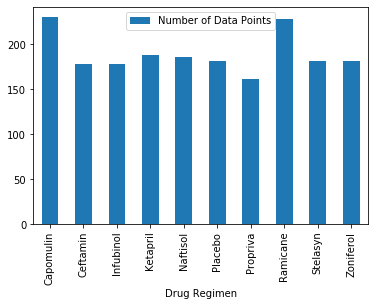

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points_pd = tot_df[["Drug Regimen","Mouse ID"]]

data_points_pd = data_points_pd.groupby("Drug Regimen").count()

data_points_pd = data_points_pd.rename(columns={"Mouse ID":"Number of Data Points"})

data_points_pd = data_points_pd.reset_index()

pandas_bar = data_points_pd.plot.bar(x="Drug Regimen", y='Number of Data Points', rot=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

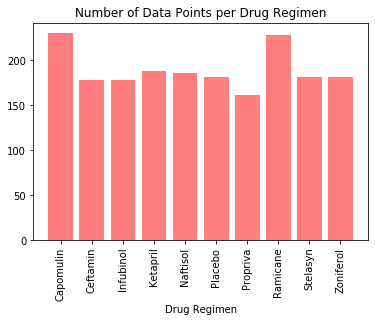

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.bar(data_points_pd["Drug Regimen"], data_points_pd["Number of Data Points"], color = 'r', alpha = 0.5, align = "center")

plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')



## Pie plots

,Data
Sex,
Female,124
Male,125


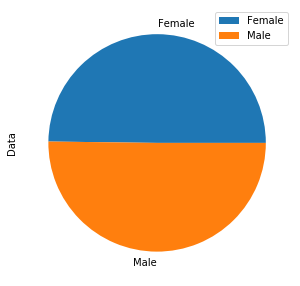

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot_pd = mouse_metadata[["Mouse ID", "Sex"]]
pie_plot_pd = pie_plot_pd.groupby("Sex").count()
pie_plot_pd = pie_plot_pd.rename(columns={"Mouse ID":"Data"})


pandas_pie = pie_plot_pd.plot.pie(y="Data", figsize = (5,5))

pie_plot_pd

([<matplotlib.patches.Wedge at 0x1926702a108>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

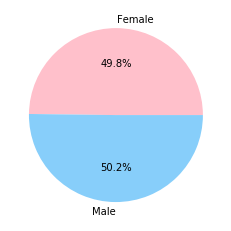

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_plot_pd = pie_plot_pd.reset_index()

colors = ["pink", "lightskyblue"]

plt.pie(pie_plot_pd["Data"], labels=pie_plot_pd["Sex"], autopct="%1.1f%%",colors = colors)


## Quartiles, outliers and boxplots

the best drugs are: ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
The lower quartile of volume is: 37.187743802499995
The upper quartile of volume is: 59.930261755000004
The interquartile range of volume is: 22.74251795250001
The the median of volume is: 45.0 


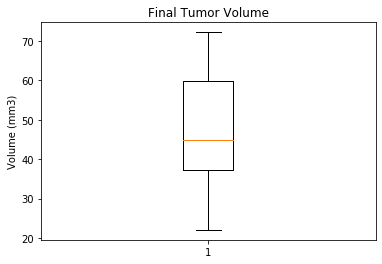

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Finding top 4 drug regimens by lowest tumor growth rate over time.
final_V = tot_df.copy()
final_V = final_V[["Mouse ID","Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

best_drug = mouse_metadata[["Mouse ID", "Drug Regimen"]]

max_time = final_V[["Mouse ID","Timepoint"]]
max_time = max_time.groupby("Mouse ID").max()

best_drug = pd.merge(best_drug, max_time, on = "Mouse ID")

tumor_start = final_V[["Mouse ID", "Tumor Volume (mm3)"]]
tumor_start = tumor_start.groupby("Mouse ID").first()

best_drug = pd.merge(best_drug, tumor_start, on = "Mouse ID")
best_drug = best_drug.rename(columns = {"Tumor Volume (mm3)":"Start Volume"} )

tumor_end = final_V[["Mouse ID", "Tumor Volume (mm3)"]]
tumor_end = tumor_end.groupby("Mouse ID").last()

best_drug = pd.merge(best_drug, tumor_end, on = "Mouse ID")
best_drug = best_drug.rename(columns = {"Tumor Volume (mm3)":"Final Volume"} )

best_drug.loc[:,"Rate of Change in Volume"] = (best_drug.loc[:,"Final Volume"]-best_drug.loc[:,"Start Volume"])/best_drug.loc[:,"Timepoint"]

best_drug = best_drug[["Drug Regimen", "Rate of Change in Volume"]]

best_drug = best_drug.groupby("Drug Regimen").mean()

best_drug = best_drug.sort_values(by=["Rate of Change in Volume"])

best_drug = best_drug.reset_index()
best_drug_ls = [best_drug.loc[0,"Drug Regimen"],best_drug.loc[1,"Drug Regimen"],best_drug.loc[2,"Drug Regimen"],best_drug.loc[3,"Drug Regimen"]]

print(f"the best drugs are: {best_drug_ls}")

tumor_end = final_V[["Mouse ID", "Tumor Volume (mm3)","Drug Regimen"]]
tumor_end = tumor_end.groupby("Mouse ID").last()

final_tumor = tumor_end[(tumor_end["Drug Regimen"] == best_drug_ls[0]) | (tumor_end["Drug Regimen"] == best_drug_ls[1]) | (tumor_end["Drug Regimen"] == best_drug_ls[2])| (tumor_end["Drug Regimen"] == best_drug_ls[3])]
final_tumor = final_tumor.rename(columns={"Tumor Volume (mm3)":"Final Volume"})
final_tumor = final_tumor.reset_index().drop(columns=["Mouse ID"])

#IQR stuff
quartiles = final_tumor.quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25, "Final Volume"]
upperq = quartiles.loc[0.75, "Final Volume"]
iqr = upperq-lowerq
mean = quartiles.loc[0.5, "Final Volume"]

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {mean} ")



final_tumor = final_tumor.sort_values(by='Final Volume', ascending=False)
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Volume (mm3)')
ax1.boxplot(final_tumor["Final Volume"])
plt.show()


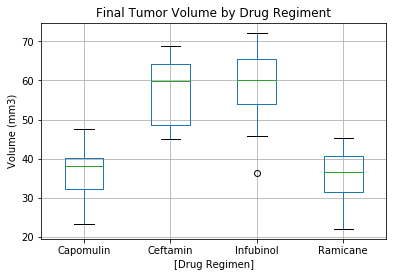

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plot = final_tumor.boxplot(by = 'Drug Regimen')
plt.title('Final Tumor Volume by Drug Regiment')
plt.suptitle("")
plt.ylabel('Volume (mm3)')
#ax1.boxplot(final_tumor["Final Volume"])
plt.show()

## Line and scatter plots

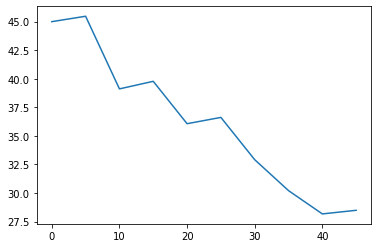

,Timepoint,Tumor Volume (mm3)
20,0,45.000000
21,5,45.473753
22,10,39.113891
23,15,39.776250
24,20,36.065835
25,25,36.617120
26,30,32.915292
27,35,30.206825
28,40,28.167397
29,45,28.484033


In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomul_mouse = tot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# using x401 as the mouse in question
capomul_mouse = capomul_mouse.loc[(capomul_mouse["Mouse ID"] == "x401")]

capomul_mouse = capomul_mouse.drop(columns=["Mouse ID"])

plt.plot(capomul_mouse["Timepoint"],capomul_mouse["Tumor Volume (mm3)"])
plt.show()

capomul_mouse



Text(0, 0.5, 'Tumor Volume (mm3)')

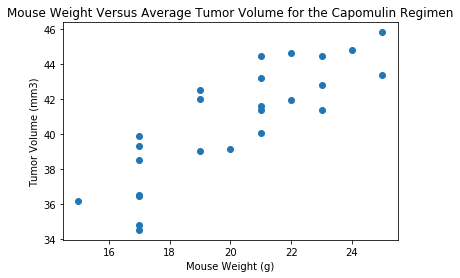

In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

w_vs_v = tot_df.copy()

w_vs_v = w_vs_v[["Mouse ID","Drug Regimen", "Tumor Volume (mm3)","Weight (g)"]]
w_vs_v = w_vs_v.loc[(w_vs_v["Drug Regimen"] == "Capomulin")]
w_vs_v = w_vs_v.groupby("Mouse ID").mean()

plt.scatter(w_vs_v["Weight (g)"], w_vs_v["Tumor Volume (mm3)"])
plt.title("Mouse Weight Versus Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")




The correlation between both factors is 0.84


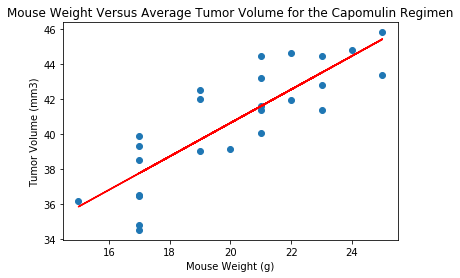

In [38]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

#determine correlation, code from activity used as baseline
correlation = st.pearsonr(w_vs_v["Weight (g)"], w_vs_v["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

#show linear regression, code from activity used as baseline
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(w_vs_v["Weight (g)"], w_vs_v["Tumor Volume (mm3)"])
regress_values = w_vs_v["Weight (g)"] * slope + intercept
plt.scatter(w_vs_v["Weight (g)"], w_vs_v["Tumor Volume (mm3)"])
plt.plot(w_vs_v["Weight (g)"],regress_values,"r-")
plt.title("Mouse Weight Versus Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
